In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

# **Descriptive Statistics**

## 1. NOx emissions

In [5]:
NOx_11='Data/dublin-city-council-no--no2-2011.csv'
df_NOx_11=pd.read_csv(NOx_11)
df_NOx_11=df_NOx_11.drop(df_NOx_11.columns[[2,3,4,5,6,7,11,13,17,19,20,21]] ,axis=1)

In [14]:
df_NOx_11.replace('[a-zA-Z]',np.nan,inplace=True, regex=True)

In [15]:
df_NOx_11.T.isnull().any().sum()

3639

### _1.1 Μετατροπή στοιχείων σε "Νumeric"_

In [16]:
df_NOx_11["Time"].replace(to_replace="24:00",value="0:00",inplace=True)

In [17]:
col0=pd.to_datetime(df_NOx_11["Date"])
col1=pd.to_datetime(df_NOx_11["Time"]).dt.hour
col2=pd.to_numeric(df_NOx_11['NO2 ug/m3.1'], errors='coerce')
col3=pd.to_numeric(df_NOx_11['NO ug/m3.1'], errors='coerce')
col4=pd.to_numeric(df_NOx_11['NOx ug/m3.1'], errors='coerce')

col6=pd.to_numeric(df_NOx_11['NO2 ug/m3.2'], errors='coerce')
col7=pd.to_numeric(df_NOx_11['NO ug/m3.2'], errors='coerce')
col8=pd.to_numeric(df_NOx_11['NOx ug/m3.2'], errors='coerce')

d1={"Date":col0,"Time":col1,"NO2 ug/m3.1":col2,'NO ug/m3.1':col3,'NOx ug/m3.1':col4,
   'NO2 ug/m3.2':col6,'NO ug/m3.2':col7,'NOx ug/m3.2':col8}
df_NOx_11=pd.DataFrame(d1)

In [18]:
df_NOx_11.index

RangeIndex(start=0, stop=12272, step=1)

In [19]:
df_NOx_11.head()

,Date,NO ug/m3.1,NO ug/m3.2,NO2 ug/m3.1,NO2 ug/m3.2,NOx ug/m3.1,NOx ug/m3.2,Time
0,2011-01-01,5.3,37.5,23.7,48.9,28.9,86.5,1.0
1,2011-01-01,6.5,17.8,24.0,44.1,30.5,61.9,2.0
2,2011-01-01,12.8,5.9,26.8,35.0,39.6,41.0,3.0
3,2011-01-01,12.8,10.7,27.0,38.3,39.9,49.0,4.0
4,2011-01-01,5.4,8.4,19.3,35.5,24.7,43.9,5.0


In [20]:
df_NOx_11[1:8]

,Date,NO ug/m3.1,NO ug/m3.2,NO2 ug/m3.1,NO2 ug/m3.2,NOx ug/m3.1,NOx ug/m3.2,Time
1,2011-01-01,6.5,17.8,24.0,44.1,30.5,61.9,2.0
2,2011-01-01,12.8,5.9,26.8,35.0,39.6,41.0,3.0
3,2011-01-01,12.8,10.7,27.0,38.3,39.9,49.0,4.0
4,2011-01-01,5.4,8.4,19.3,35.5,24.7,43.9,5.0
5,2011-01-01,13.2,5.4,25.2,33.7,38.4,39.1,6.0
6,2011-01-01,20.6,13.0,22.5,38.4,43.1,51.4,7.0
7,2011-01-01,4.6,3.0,13.6,30.2,18.3,33.2,8.0


In [21]:
index=pd.DatetimeIndex(df_NOx_11["Date"])

In [22]:
index

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01',
               ...
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='Date', length=12272, freq=None)

In [23]:
print("NaN values=",df_NOx_11.T.isnull().any().sum())

NaN values= 3639


In [24]:
print("NaN values=",df_NOx_11.T.isnull().any().sum())

NaN values= 3639


In [25]:
df_NOx_11["NO ug/m3_avg"]=df_NOx_11[["NO ug/m3.1","NO ug/m3.2"]].mean(axis=1)
df_NOx_11["NO2 ug/m3_avg"]=df_NOx_11[["NO2 ug/m3.1","NO2 ug/m3.2"]].mean(axis=1)
df_NOx_11["NOx ug/m3_avg"]=df_NOx_11[["NOx ug/m3.1","NOx ug/m3.2"]].mean(axis=1)

In [26]:
NO_1=df_NOx_11.pop("NO ug/m3.1")
NO_2=df_NOx_11.pop("NO ug/m3.2")
NO2_1=df_NOx_11.pop("NO2 ug/m3.1")
NO2_2=df_NOx_11.pop("NO2 ug/m3.2")
NOx_1=df_NOx_11.pop("NOx ug/m3.1")
NOx_2=df_NOx_11.pop("NOx ug/m3.2")

In [27]:
df_NOx_11.tail(30)

,Date,Time,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg
12242,NaT,NaN,NaN,NaN,NaN
12243,NaT,NaN,NaN,NaN,NaN
12244,NaT,NaN,NaN,NaN,NaN
12245,NaT,NaN,NaN,NaN,NaN
12246,NaT,NaN,NaN,NaN,NaN
12247,NaT,NaN,NaN,NaN,NaN
12248,NaT,NaN,NaN,NaN,NaN
12249,NaT,NaN,NaN,NaN,NaN
12250,NaT,NaN,NaN,NaN,NaN
12251,NaT,NaN,NaN,NaN,NaN


In [28]:
df_NOx_11.dropna(axis=0, how='any',inplace=True)

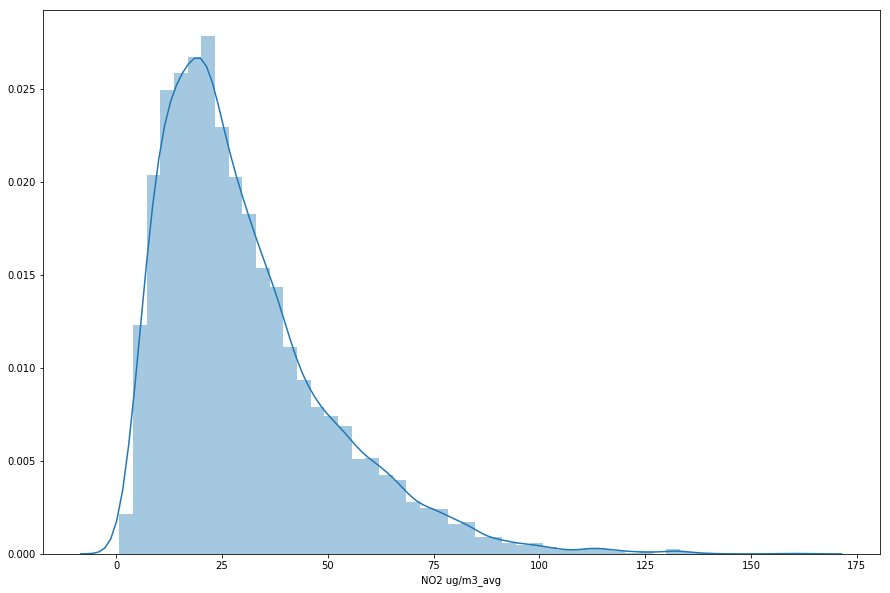

In [29]:
fig00=plt.figure(figsize=(15,10))
sns.distplot(df_NOx_11["NO2 ug/m3_avg"])

## 2. CO emissions

In [6]:
CO_11='Data/dublin-city-council-co-2011.csv'
df_CO_11=pd.read_csv(CO_11)
df_CO_11=df_CO_11.drop(df_CO_11.columns[[5,9]] ,axis=1)

### _2.1 Μετατροπή στοιχείων σε "Νumeric"_

In [31]:
col0=pd.to_datetime(df_NOx_11["Date"])
col1=df_CO_11['Time']
col2=pd.to_numeric(df_CO_11['CO mg/m3'], errors='coerce')
col3=pd.to_numeric(df_CO_11['8 hr roling avg'], errors='coerce')

col5=pd.to_numeric(df_CO_11['CO mg/m3.1'], errors='coerce')
col6=pd.to_numeric(df_CO_11['8 hr roling avg.1'], errors='coerce')

d2={"Date":col0,"Time":col1,"CO mg/m3":col2,'8 hr roling avg':col3,
   'CO mg/m3.1':col5,'8 hr roling avg.1':col6}
df_CO_11=pd.DataFrame(d2)

In [32]:
df_CO_11.head()

,8 hr roling avg,8 hr roling avg.1,CO mg/m3,CO mg/m3.1,Date,Time
0,0.1,0.5,0.2,0.5,2011-01-01,1.0
1,0.1,0.5,0.1,0.6,2011-01-01,2.0
2,0.1,0.6,0.1,0.6,2011-01-01,3.0
3,0.1,0.5,0.1,0.5,2011-01-01,4.0
4,0.1,0.5,0.1,0.4,2011-01-01,5.0


In [33]:
print("NaN values=",df_CO_11.T.isnull().any().sum())

NaN values= 510


In [34]:
df_CO_11["CO mg/m3_avg"]=df_CO_11[["CO mg/m3","CO mg/m3.1"]].mean(axis=1)

In [35]:
CO_1=df_CO_11.pop("CO mg/m3.1")
CO_2=df_CO_11.pop("CO mg/m3")
CO_8_hr_avg_1=df_CO_11.pop("8 hr roling avg.1")
CO_8_hr_avg_2=df_CO_11.pop("8 hr roling avg")

In [36]:
df_CO_11.tail(30)

,Date,Time,CO mg/m3_avg
8730,2011-12-30,19.0,0.10
8731,2011-12-30,20.0,0.10
8732,2011-12-30,21.0,0.10
8733,2011-12-30,22.0,0.05
8734,2011-12-30,23.0,0.05
8735,2011-12-30,0.0,0.05
8736,2011-12-31,1.0,0.05
8737,2011-12-31,2.0,0.05
8738,2011-12-31,3.0,0.00
8739,2011-12-31,4.0,0.05


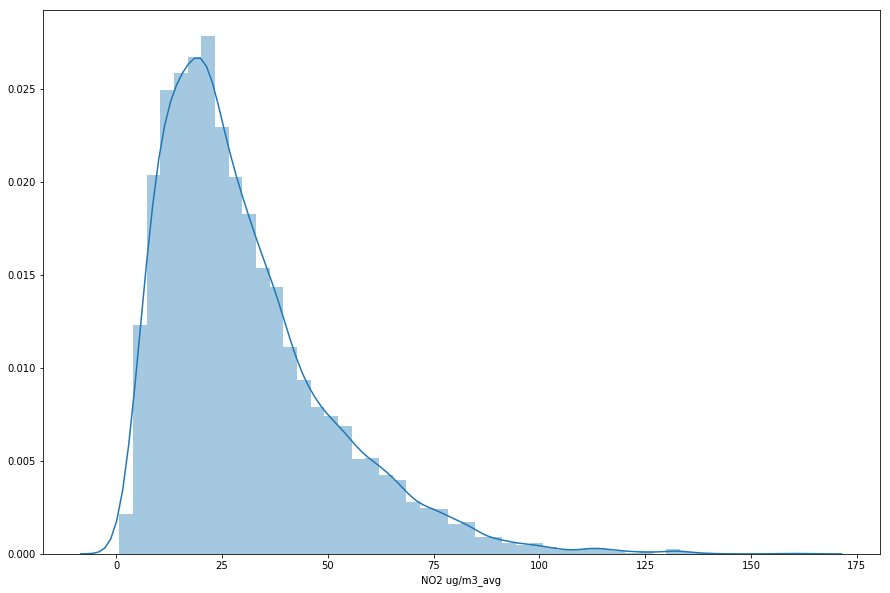

In [37]:
fig01=plt.figure(figsize=(15,10))
sns.distplot(df_NOx_11["NO2 ug/m3_avg"])


## 3. SO2 emissions

In [7]:
SO2_11='Data/dublin-city-council-so2-2011.csv'
df_SO2_11=pd.read_csv(SO2_11)
df_SO2_11.drop(df_SO2_11.columns[[3,5,7,9,10,11,12,13]] ,axis=1,inplace=True)
df_SO2_11.drop([0],inplace=True)

### _3.1 Μετατροπή στοιχείων σε "Νumeric"_

In [39]:
col0=pd.to_datetime(df_SO2_11["Date"],errors='coerce')
col1=df_SO2_11['Time']
col2=pd.to_numeric(df_SO2_11['SO2 ug/m3'], errors='coerce')

col4=pd.to_numeric(df_SO2_11['SO2 ug/m3.1'], errors='coerce')

d4={"Date":col0,"Time":col1,"SO2 ug/m3":col2,'SO2 ug/m3.1':col4}
df_SO2_11=pd.DataFrame(d4)

In [40]:
df_SO2_11.head()

,Date,SO2 ug/m3,SO2 ug/m3.1,Time
1,2011-01-01,2.2,0.2,1.0
2,2011-01-01,2.0,0.0,2.0
3,2011-01-01,1.7,0.1,3.0
4,2011-01-01,1.7,0.0,4.0
5,2011-01-01,1.5,0.0,5.0


In [41]:
print("Nan values=",df_SO2_11.T.isnull().any().sum())

Nan values= 1237


In [42]:
df_SO2_11["SO2 mg/m3_avg"]=df_SO2_11[["SO2 ug/m3","SO2 ug/m3.1"]].mean(axis=1)


In [43]:
SO2_1=df_SO2_11.pop("SO2 ug/m3.1")
SO2_2=df_SO2_11.pop("SO2 ug/m3")

In [44]:
df_SO2_11.shape

(8780, 3)

In [45]:
df_NOx_11.shape

(8757, 5)

In [46]:
df_CO_11.shape

(8760, 3)

In [47]:
Emission1=df_NOx_11.merge(df_CO_11,on=["Date",'Time'],how="inner")

In [48]:
Emission1.shape

(8756, 6)

In [49]:
emission=Emission1.merge(df_SO2_11,on=["Date",'Time'],how="inner")

In [50]:
emission.tail(5)

,Date,Time,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg
8750,2011-12-31,19.0,6.90,15.95,22.85,0.1,-0.25
8751,2011-12-31,20.0,6.45,17.15,23.70,0.1,-0.40
8752,2011-12-31,21.0,6.15,13.90,20.05,0.1,-0.30
8753,2011-12-31,22.0,4.60,12.55,17.10,0.1,-0.20
8754,2011-12-31,23.0,4.40,10.15,14.55,0.1,-0.30


## 4. PM emissions

In [8]:
PM_11='Data/dublin-city-council-pm10--2.5-2011.csv'
df_PM_11=pd.read_csv(PM_11)
df_PM_11=df_PM_11.drop(df_PM_11.columns[18:52] ,axis=1).drop(df_PM_11.columns[[3,6,9,12,15,16,17]] ,axis=1)

### _4.1 Μετατροπή στοιχείων σε "Νumeric"_

In [52]:
col0=pd.to_datetime(df_PM_11["Date"], errors='coerce')
col1=pd.to_numeric(df_PM_11['PM2.5 ug/m3'], errors='coerce')

col3=pd.to_numeric(df_PM_11['PM2.5 ug/m3.1'], errors='coerce')

col5=pd.to_numeric(df_PM_11['PM10 ug/m3'], errors='coerce')

col7=pd.to_numeric(df_PM_11['PM10 ug/m3.1'], errors='coerce')

col9=pd.to_numeric(df_PM_11['PM10 ug/m3.2'], errors='coerce')


d3={"Date":col0,'PM2.5 ug/m3':col1,"Flag":col2,'PM2.5 ug/m3.1':col3,
   'PM10 ug/m3':col5,'PM10 ug/m3.1':col7,'PM10 ug/m3.2':col9}
df_PM_11=(pd.DataFrame(d3))


In [53]:
df_PM_11.tail(4)

,Date,Flag,PM10 ug/m3,PM10 ug/m3.1,PM10 ug/m3.2,PM2.5 ug/m3,PM2.5 ug/m3.1
8777,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8778,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8779,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8780,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
print("Nan values=",df_PM_11.T.isnull().any().sum())

Nan values= 8481


In [55]:
df_PM_11["PM10 mg/m3_avg"]=df_PM_11[["PM10 ug/m3","PM10 ug/m3.1","PM10 ug/m3.2"]].mean(axis=1)
df_PM_11["PM2.5 mg/m3_avg"]=df_PM_11[["PM2.5 ug/m3","PM2.5 ug/m3.1"]].mean(axis=1)

In [56]:
df_PM_11.drop(["PM10 ug/m3","PM10 ug/m3.1","PM10 ug/m3.2","PM2.5 ug/m3","PM2.5 ug/m3.1"], axis=1, inplace=True)

In [57]:
df_PM_11.iloc[360:369]

,Date,Flag,PM10 mg/m3_avg,PM2.5 mg/m3_avg
360,2011-12-27,0.0,8.333333,4.25
361,2011-12-28,0.0,11.200000,5.65
362,2011-12-29,0.0,17.466667,15.30
363,2011-12-30,0.0,14.166667,6.95
364,2011-12-31,0.0,7.600000,5.45
365,NaT,0.0,NaN,NaN
366,NaT,0.0,NaN,NaN
367,NaT,0.0,NaN,NaN
368,NaT,0.0,14.000000,10.00


In [58]:
df_PM_11.drop(df_PM_11.index[365:],inplace=True)

In [59]:
df_PM_11.head()

,Date,Flag,PM10 mg/m3_avg,PM2.5 mg/m3_avg
0,2011-01-01,NaN,18.366667,16.90
1,2011-01-02,2.2,13.433333,10.75
2,2011-01-03,2.0,21.166667,21.55
3,2011-01-04,1.7,10.166667,8.70
4,2011-01-05,1.7,10.950000,9.20


## 5. Meteorological data Pheonix park

In [9]:
meteo_park='Data/Phoenix_Park.csv'
df_meteo_park=pd.read_csv(meteo_park,low_memory=False,parse_dates=["date"])

In [61]:
df_meteo_park.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
0,2007-06-01 00:00:00,-1,,0,7.8,0,7.4,7.1,10.1,95,1011.4
1,2007-06-01 01:00:00,0,0.0,0,7.3,0,7.1,6.8,9.9,96,1011.9
2,2007-06-01 02:00:00,0,0.0,0,6.6,0,6.4,6.1,9.4,97,1012.4
3,2007-06-01 03:00:00,0,0.0,0,6.3,0,6.1,5.9,9.3,97,1013.0
4,2007-06-01 04:00:00,0,0.0,0,6.1,0,6.0,5.8,9.2,98,1013.2


### _5.1 Μετατροπή στοιχείων σε "Νumeric"_

In [62]:
col1=df_meteo_park["date"].dt.hour

col0=pd.to_datetime(df_meteo_park["date"].dt.strftime('%m/%d/%Y'))

col3=pd.to_numeric(df_meteo_park['rain'], errors='coerce')

col5=pd.to_numeric(df_meteo_park['temp'], errors='coerce')



col10=pd.to_numeric(df_meteo_park['rhum'], errors='coerce')/100
col11=pd.to_numeric(df_meteo_park['msl'], errors='coerce')


d5={"Date":col0,'Time':col1,"rain":col3,'temp':col5,
   'rhum':col10,'msl':col11}
df_meteo_park=pd.DataFrame(d5)

In [63]:
df_meteo_park.iloc[100:110]

,Date,Time,msl,rain,rhum,temp
100,2007-06-05,4,1027.8,0.0,0.98,9.2
101,2007-06-05,5,1028.0,0.0,0.99,10.3
102,2007-06-05,6,1027.9,0.0,0.98,11.9
103,2007-06-05,7,1028.1,0.0,0.83,13.8
104,2007-06-05,8,1028.2,0.0,0.77,14.5
105,2007-06-05,9,1027.9,0.0,0.73,15.3
106,2007-06-05,10,1027.6,0.0,0.74,15.8
107,2007-06-05,11,1027.4,0.0,0.73,16.3
108,2007-06-05,12,1027.3,0.0,0.68,16.6
109,2007-06-05,13,1027.0,0.0,0.63,16.9


## 6. Traffic flow data 


### 6.1 Το τελευταίο κομμάτι του αυτοκινητόδρομου Μ4

In [11]:
traffic="Data/M04-34(Maynooth West-2011).csv"
df_traffic_M4=pd.read_csv(traffic)
df_traffic_M4.insert(loc=2, column="Time", value=df_traffic_M4["Hour ending"]//100)

del df_traffic_M4["Day of Week"]
del df_traffic_M4["Hour ending"]

In [65]:
df_traffic_M4.head()

,Date,Time,Hourly volume Westbound,HCV % Westbound,Hourly volume Eastbound,HCV % Eastbound,Total volume,Total % HCV
0,Jan 1 2011,1,84,7.1,80,6.2,164,6.7
1,Jan 1 2011,2,166,3.6,99,1.0,265,2.6
2,Jan 1 2011,3,125,1.6,81,4.9,206,2.9
3,Jan 1 2011,4,80,2.5,66,4.5,146,3.4
4,Jan 1 2011,5,72,0.0,51,5.9,123,2.4


In [66]:
df_traffic_M4["Date"]=pd.to_datetime(df_traffic_M4["Date"])

In [67]:
df_traffic_M4['Time'].replace(to_replace=24,value=0,inplace=True)

In [68]:
HCV_West_M4=df_traffic_M4.pop("HCV % Westbound")

In [69]:
HCV_South_M4=df_traffic_M4.pop("HCV % Eastbound")

In [70]:
Tot_vol_M4=df_traffic_M4.pop("Total volume")

In [71]:
Tot_HCV_M4=df_traffic_M4.pop("Total % HCV")

In [72]:
print("NaN values=",Tot_HCV_M4.T.isnull().any().sum())

NaN values= 0


In [73]:
df_traffic_M4.head()

,Date,Time,Hourly volume Westbound,Hourly volume Eastbound
0,2011-01-01,1,84,80
1,2011-01-01,2,166,99
2,2011-01-01,3,125,81
3,2011-01-01,4,80,66
4,2011-01-01,5,72,51


In [74]:
df_traffic_M4[df_traffic_M4["Hourly volume Eastbound"]<0]

,Date,Time,Hourly volume Westbound,Hourly volume Eastbound
6574,2011-10-30,23,-2,-2


In [75]:
df_traffic_M4.drop(6574,inplace=True)


### 6.2 Το τελευταίο κομμάτι του αυτοκινητόδρομου Μ3

In [12]:
traffic="Data/M03-3a(Dunboyne-2011).csv"
df_traffic_M3=pd.read_csv(traffic)
df_traffic_M3.insert(loc=2, column="Time", value=df_traffic_M3["Hour ending"]//100)
del df_traffic_M3["Day of Week"]
del df_traffic_M3["Hour ending"]


In [90]:
df_traffic_M3["Date"]=pd.to_datetime(df_traffic_M3["Date"])

In [91]:
df_traffic_M3['Time'].replace(to_replace=24,value=0,inplace=True)

In [92]:
HCV_West_M3=df_traffic_M3.pop("HCV % Northbound")

In [93]:
Tot_vol_M3=df_traffic_M3.pop("Total volume")

In [94]:
Tot_HCV_M3=df_traffic_M3.pop("Total % HCV")

In [95]:
HCV_South_M3=df_traffic_M3.pop("HCV % Southbound")

In [96]:
print("NaN values=",Tot_HCV_M3.T.isnull().any().sum())

NaN values= 0


In [97]:
df_traffic_M3.loc["2011-09-20":"2011-010-20"]

,Date,Time,Hourly volume Southbound,Hourly volume Northbound


In [98]:
df_traffic_M3[df_traffic_M3["Hourly volume Southbound"]<0]

,Date,Time,Hourly volume Southbound,Hourly volume Northbound
6982,2011-10-30,23,-3,-3


In [99]:
df_traffic_M3.drop(6982,inplace=True)


## 7. Ένωση πινάκων 

In [100]:
tot_traffic=df_traffic_M3.merge(df_traffic_M4, on=["Date","Time"], how='inner')

In [101]:
tot_traffic.shape

(7847, 6)

In [102]:
print("NaN values=",tot_traffic.T.isnull().any().sum())

NaN values= 0


In [137]:
tot_traffic["Total Hourly volume"]=tot_traffic['Hourly volume Southbound']+tot_traffic['Hourly volume Eastbound']
tot_traffic["vol FROM the city"]=tot_traffic['Hourly volume Northbound']+tot_traffic['Hourly volume Westbound']

In [138]:
tot_traffic.head()

,Date,Time,Hourly volume Southbound,Hourly volume Northbound,Hourly volume Westbound,Hourly volume Eastbound,vol TO the city,vol FROM the city,Total Hourly volume
0,2011-01-01,1,63,108,84,80,143,192,143
1,2011-01-01,2,87,198,166,99,186,364,186
2,2011-01-01,3,74,120,125,81,155,245,155
3,2011-01-01,4,61,104,80,66,127,184,127
4,2011-01-01,5,38,71,72,51,89,143,89


In [139]:
tot_traffic[tot_traffic["vol TO the city"]<0]

,Date,Time,Hourly volume Southbound,Hourly volume Northbound,Hourly volume Westbound,Hourly volume Eastbound,vol TO the city,vol FROM the city,Total Hourly volume


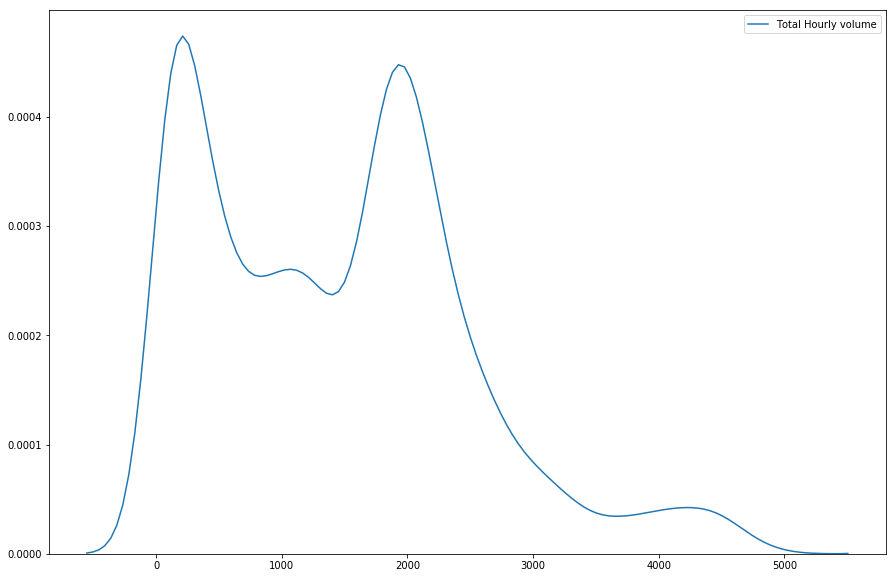

In [140]:
plt.figure(figsize=(15,10))
sns.kdeplot(tot_traffic["Total Hourly volume"])

In [141]:
df00=(tot_traffic.merge(df_NOx_11,on=["Date","Time"],how="inner")).merge(df_meteo_park,on=["Date","Time"],how="inner")

In [142]:
df00.shape

(7845, 16)

In [143]:
df1=tot_traffic.merge(emission,on=["Date","Time"],how="inner")

In [144]:
df2=df1.merge(df_meteo_park,on=["Date","Time"],how="inner")

In [145]:
df2["Time"].head()

0    1
1    2
2    3
3    4
4    5
Name: Time, dtype: object

In [146]:
df2["Date"]=df2["Date"].dt.strftime('%d/%m/%Y')

In [147]:
df2["Time"]=df2["Time"].astype(str)

In [148]:
Datetime=df2["Date"]+df2["Time"]

In [149]:
df2.insert(loc=2, column="Datetime", value=pd.to_datetime(Datetime,format="%d/%m/%Y%H"))

In [150]:
del df2["Date"]

In [151]:
df2["Time"]=df2["Time"].astype(int)

In [152]:
df2_indexed=df2.set_index(["Datetime"],drop=False)

In [153]:
df2_indexed.isnull().sum()

Time                         0
Datetime                     0
Hourly volume Southbound     0
Hourly volume Northbound     0
Hourly volume Westbound      0
Hourly volume Eastbound      0
vol TO the city              0
vol FROM the city            0
Total Hourly volume          0
NO ug/m3_avg                 0
NO2 ug/m3_avg                0
NOx ug/m3_avg                0
CO mg/m3_avg                 0
SO2 mg/m3_avg                4
msl                          0
rain                        24
rhum                         0
temp                         0
dtype: int64

In [154]:
df2_indexed.dropna(axis=0, how='any',inplace=True)

In [155]:
Day=df2_indexed["Datetime"].dt.weekday_name

In [156]:
Month=df2_indexed["Datetime"].dt.month

In [157]:
df2_indexed.insert(loc=0,column="Day",value=Day)
df2_indexed.insert(loc=1,column="Month",value=Month)

## ΑΝΤΙΚΑΘΣΤΏ ΠΑΛΙ στη στήλη Τime το 0 με 24

In [158]:
df2_indexed["Time"].replace(0,24,inplace=True)

In [159]:
df2_indexed.sort_index(inplace=True)

In [160]:
df2_indexed.head(50)

,Day,Month,Time,Datetime,Hourly volume Southbound,Hourly volume Northbound,Hourly volume Westbound,Hourly volume Eastbound,vol TO the city,vol FROM the city,Total Hourly volume,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
Datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 01:00:00,Saturday,1,1,2011-01-01 01:00:00,63,108,84,80,143,192,143,21.40,36.30,57.70,0.35,1.20,1028.0,0.0,0.86,5.5
2011-01-01 02:00:00,Saturday,1,2,2011-01-01 02:00:00,87,198,166,99,186,364,186,12.15,34.05,46.20,0.35,1.00,1027.6,0.0,0.88,5.4
2011-01-01 03:00:00,Saturday,1,3,2011-01-01 03:00:00,74,120,125,81,155,245,155,9.35,30.90,40.30,0.35,0.90,1027.5,0.0,0.89,5.3
2011-01-01 04:00:00,Saturday,1,4,2011-01-01 04:00:00,61,104,80,66,127,184,127,11.75,32.65,44.45,0.30,0.85,1027.5,0.0,0.90,5.3
2011-01-01 05:00:00,Saturday,1,5,2011-01-01 05:00:00,38,71,72,51,89,143,89,6.90,27.40,34.30,0.25,0.75,1027.3,0.0,0.90,5.5
2011-01-01 06:00:00,Saturday,1,6,2011-01-01 06:00:00,49,92,67,66,115,159,115,9.30,29.45,38.75,0.25,0.70,1027.1,0.0,0.89,5.6
2011-01-01 07:00:00,Saturday,1,7,2011-01-01 07:00:00,83,62,102,181,264,164,264,16.80,30.45,47.25,0.25,0.60,1027.4,0.0,0.90,5.5
2011-01-01 08:00:00,Saturday,1,8,2011-01-01 08:00:00,170,95,135,195,365,230,365,3.80,21.90,25.75,0.20,0.40,1027.5,0.0,0.91,5.4
2011-01-01 09:00:00,Saturday,1,9,2011-01-01 09:00:00,105,136,177,159,264,313,264,3.85,24.25,28.10,0.20,0.30,1027.8,0.0,0.93,5.6


In [161]:
df2_indexed.to_csv("Πίνακας",sep=",",index=False)

In [162]:
df2.head()

,Time,Datetime,Hourly volume Southbound,Hourly volume Northbound,Hourly volume Westbound,Hourly volume Eastbound,vol TO the city,vol FROM the city,Total Hourly volume,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
0,1,2011-01-01 01:00:00,63,108,84,80,143,192,143,21.40,36.30,57.70,0.35,1.20,1028.0,0.0,0.86,5.5
1,2,2011-01-01 02:00:00,87,198,166,99,186,364,186,12.15,34.05,46.20,0.35,1.00,1027.6,0.0,0.88,5.4
2,3,2011-01-01 03:00:00,74,120,125,81,155,245,155,9.35,30.90,40.30,0.35,0.90,1027.5,0.0,0.89,5.3
3,4,2011-01-01 04:00:00,61,104,80,66,127,184,127,11.75,32.65,44.45,0.30,0.85,1027.5,0.0,0.90,5.3
4,5,2011-01-01 05:00:00,38,71,72,51,89,143,89,6.90,27.40,34.30,0.25,0.75,1027.3,0.0,0.90,5.5


In [163]:
daily=df2_indexed.resample("D").mean()
weekly=df2_indexed.resample("W").mean()
monthly=df2_indexed.resample("M").mean()



In [164]:
weekly.T.isnull().any().sum()

3

In [165]:
weekly.dropna(axis=0, how='any',inplace=True)

In [166]:
daily.T.isnull().any().sum()

38

In [167]:
daily.dropna(axis=0, how='any',inplace=True)

In [ ]:
monthly.T.isnull().any().sum()

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,figsize=(18,14),)

ax1.plot(weekly["Total Hourly volume"])
ax1.set_ylabel("Total Hourly volume")
ax2.plot(weekly["NO ug/m3_avg"])
ax2.set_ylabel("NO ug/m3_avg")
ax3.plot(weekly["NO2 ug/m3_avg"])
ax3.set_ylabel("NO2 ug/m3_avg")
ax4.plot(weekly["NOx ug/m3_avg"])
ax4.set_ylabel("NOx ug/m3_avg")
ax5.plot(weekly["CO mg/m3_avg"])
ax5.set_ylabel("CO mg/m3_avg")
ax6.plot(weekly["SO2 mg/m3_avg"])
ax6.set_ylabel("SO2 mg/m3_avg")

ax7.plot(weekly["msl"])
ax7.set_ylabel("msl")
ax8.plot(weekly["rain"])
ax8.set_ylabel("rain")
ax9.plot(weekly["rhum"])
ax9.set_ylabel("rhum")


plt.tight_layout()

plt.figure(figsize=(5,3))
plt.plot(weekly["temp"])
plt.ylabel("temp")
plt.tight_layout()



In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,figsize=(18,14),)

ax1.plot(daily["Total Hourly volume"])
ax1.set_ylabel("Total Hourly volume")
ax2.plot(daily["NO ug/m3_avg"])
ax2.set_ylabel("NO ug/m3_avg")
ax3.plot(daily["NO2 ug/m3_avg"])
ax3.set_ylabel("NO2 ug/m3_avg")
ax4.plot(daily["NOx ug/m3_avg"])
ax4.set_ylabel("NOx ug/m3_avg")
ax5.plot(daily["CO mg/m3_avg"])
ax5.set_ylabel("CO mg/m3_avg")
ax6.plot(daily["SO2 mg/m3_avg"])
ax6.set_ylabel("SO2 mg/m3_avg")

ax7.plot(daily["msl"])
ax7.set_ylabel("msl")
ax8.plot(daily["rain"])
ax8.set_ylabel("rain")
ax9.plot(daily["rhum"])
ax9.set_ylabel("rhum")


plt.tight_layout()

plt.figure(figsize=(5,3))
plt.plot(daily["temp"])
plt.ylabel("temp")
plt.tight_layout()



#### Έσπασα το πίνακα σε δυο υποπίνακες για να μην λάβω υπόψη την χρονική περίοδο 20-4 με 17-5 γιατί σε εκείνο το διάστημα δε εχω μετρήσεις

In [ ]:
data1=df2_indexed.loc['2011-1-1':'2011-4-20',["Total Hourly volume"]]
data2=df2_indexed.loc['2011-5-17':'2011-11-30',["Total Hourly volume"]]

In [ ]:
data1.shape

In [ ]:
df2_indexed.loc[:,["Total Hourly volume","NO ug/m3_avg","NO2 ug/m3_avg","CO mg/m3_avg","SO2 mg/m3_avg","msl","rain","rhum","temp"]].describe()

In [136]:
df2_indexed.head()

,Day,Month,Time,Datetime,Hourly volume Southbound,Hourly volume Northbound,Hourly volume Westbound,Hourly volume Eastbound,vol TO the city,vol FROM the city,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
Datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 01:00:00,Saturday,1,1,2011-01-01 01:00:00,63,108,84,80,143,192,21.40,36.30,57.70,0.35,1.20,1028.0,0.0,0.86,5.5
2011-01-01 02:00:00,Saturday,1,2,2011-01-01 02:00:00,87,198,166,99,186,364,12.15,34.05,46.20,0.35,1.00,1027.6,0.0,0.88,5.4
2011-01-01 03:00:00,Saturday,1,3,2011-01-01 03:00:00,74,120,125,81,155,245,9.35,30.90,40.30,0.35,0.90,1027.5,0.0,0.89,5.3
2011-01-01 04:00:00,Saturday,1,4,2011-01-01 04:00:00,61,104,80,66,127,184,11.75,32.65,44.45,0.30,0.85,1027.5,0.0,0.90,5.3
2011-01-01 05:00:00,Saturday,1,5,2011-01-01 05:00:00,38,71,72,51,89,143,6.90,27.40,34.30,0.25,0.75,1027.3,0.0,0.90,5.5


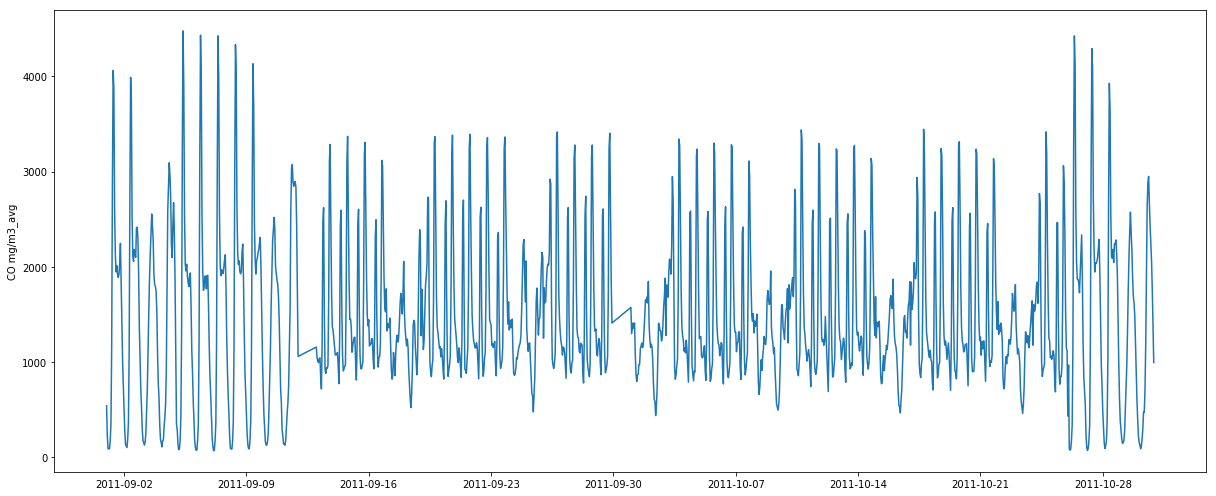

In [169]:
plt.figure(figsize=(17,7))





plt.plot(df2_indexed.loc['2011-9-1':'2011-10-30',["Total Hourly volume"]])

plt.ylabel("CO mg/m3_avg")

plt.tight_layout()

In [175]:
df2_indexed.loc["2011-9-18":"2011-9-19",["Total Hourly volume"]]

,Total Hourly volume
Datetime,
2011-09-18 00:00:00,2057
2011-09-18 01:00:00,1519
2011-09-18 02:00:00,1344
2011-09-18 03:00:00,1247
2011-09-18 04:00:00,1170
2011-09-18 05:00:00,1241
2011-09-18 06:00:00,1151
2011-09-18 07:00:00,902
2011-09-18 08:00:00,741


In [ ]:
df2_indexed.shape

In [ ]:
plt.figure(figsize=(10,5))





plt.plot(df2_indexed.loc['2011-3-15':'2011-3-30',["SO2 mg/m3_avg"]])
plt.ylabel("SO2 mg/m3_avg")
plt.tight_layout()

In [ ]:

fig5=plt.figure(figsize=(15,10))

plt.subplot(221)
plt.plot(df2_indexed.loc['2011-1-1':'2011-11-30',["msl"]])
plt.ylabel("Mean Sea Level Pressure (hPa)")

plt.subplot(222)
plt.plot(df2_indexed.loc['2011-1-1':'2011-11-30',["rhum"]])
plt.ylabel("Relative Humidity (%)")
plt.subplot(223)
plt.plot(df2_indexed.loc['2011-1-1':'2011-11-30',["temp"]])
plt.ylabel("Air Temperature (C)")

fig5.add_subplot(224)
plt.plot(df2_indexed.loc['2011-1-1':'2011-11-30',["rain"]])
plt.ylabel("Precipitation Amount (mm)")

In [ ]:
df2_indexed[df2_indexed["SO2 mg/m3_avg"]<0].shape

In [ ]:
DatetimeIndex=pd.DatetimeIndex(df2_indexed["Datetime"])

In [ ]:
fig1=plt.figure(figsize=(15,10))
sns.boxplot(x="Month",y="SO2 mg/m3_avg", data=df2_indexed)
fig2=plt.figure(figsize=(15,10))
fig2.add_subplot(2,2,1)
sns.boxplot(x="Month",y="NOx ug/m3_avg", data=df2_indexed)
plt.subplot(222)
sns.boxplot(x="Month",y="NO ug/m3_avg", data=df2_indexed)
fig3=plt.figure(figsize=(15,10))
sns.boxplot(x="Month",y="NO2 ug/m3_avg", data=df2_indexed)
fig4=plt.figure(figsize=(15,10))
plt.subplot(121)
sns.boxplot(x="Month",y="CO mg/m3_avg", data=df2_indexed)
plt.subplot(122)
sns.boxplot(x="Month",y="SO2 mg/m3_avg", data=df2_indexed)

fig5=plt.figure(figsize=(15,10))

plt.subplot(221)
sns.boxplot(x="Month",y="msl", data=df2_indexed)

plt.subplot(222)
sns.boxplot(x="Month",y="rhum", data=df2_indexed)
plt.subplot(223)
sns.boxplot(x="Month",y="temp", data=df2_indexed)

fig5.add_subplot(224)
sns.boxplot(x="Month",y="rain", data=df2_indexed)




In [ ]:

fig7=plt.figure(figsize=(15,10))
sns.boxplot(x="Time",y="NO ug/m3_avg", data=df2_indexed)
fig8=plt.figure(figsize=(15,10))
fig8.add_subplot(2,2,1)
sns.boxplot(x="Time",y="NOx ug/m3_avg", data=df2_indexed)
plt.subplot(222)
sns.boxplot(x="Time",y="NO ug/m3_avg", data=df2_indexed)
fig9=plt.figure(figsize=(15,10))
sns.boxplot(x="Time",y="NO2 ug/m3_avg", data=df2_indexed)
fig10=plt.figure(figsize=(15,10))
plt.subplot(121)
sns.boxplot(x="Time",y="CO mg/m3_avg", data=df2_indexed)
plt.subplot(122)
sns.boxplot(x="Time",y="SO2 mg/m3_avg", data=df2_indexed)

fig11=plt.figure(figsize=(15,10))

plt.subplot(221)
sns.violinplot(x="Time",y="msl", data=df2_indexed)

plt.subplot(222)
sns.boxplot(x="Time",y="rhum", data=df2_indexed)
plt.subplot(223)
sns.boxplot(x="Time",y="temp", data=df2_indexed)
plt.subplot(224)
sns.boxplot(x="Time",y="rain", data=df2_indexed)

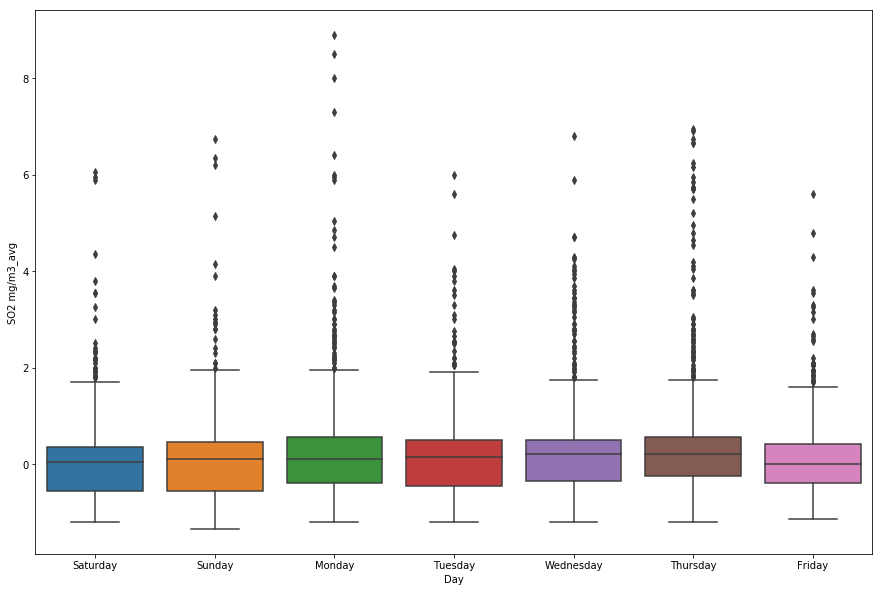

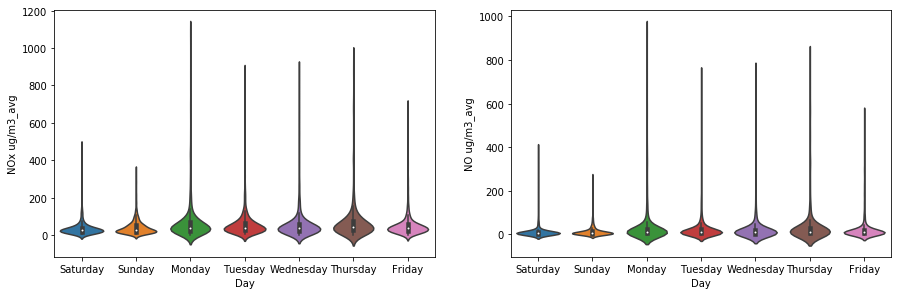

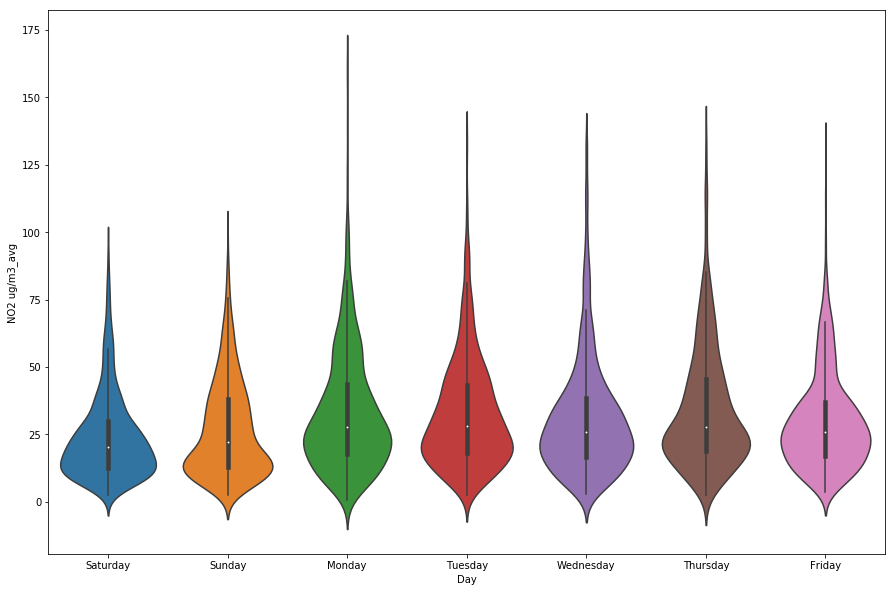

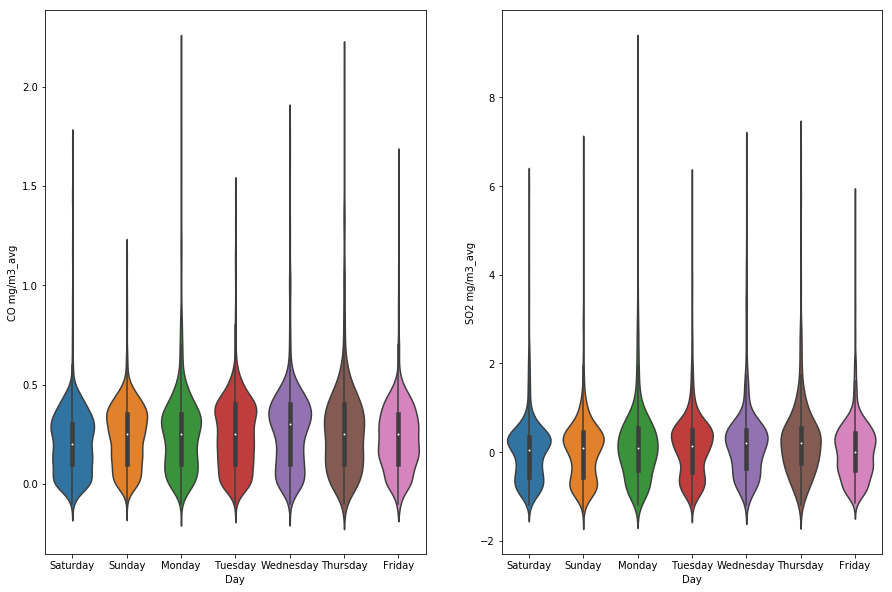

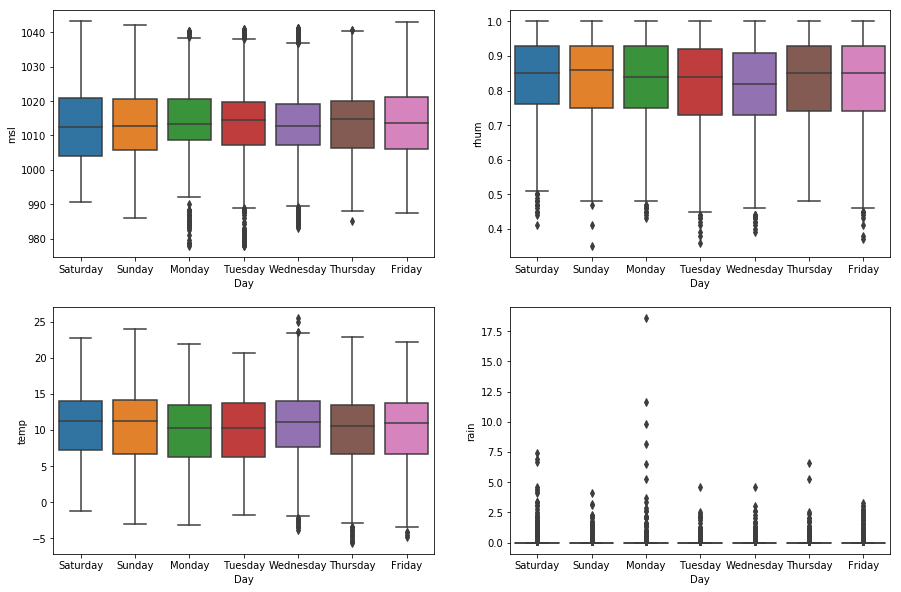

In [122]:
fig13=plt.figure(figsize=(15,10))
sns.boxplot(x="Day",y="SO2 mg/m3_avg", data=df2_indexed)
fig14=plt.figure(figsize=(15,10))
fig14.add_subplot(2,2,1)
sns.violinplot(x="Day",y="NOx ug/m3_avg", data=df2_indexed,scale="count")
plt.subplot(222)
sns.violinplot(x="Day",y="NO ug/m3_avg", data=df2_indexed,scale="count")
fig15=plt.figure(figsize=(15,10))
sns.violinplot(x="Day",y="NO2 ug/m3_avg", data=df2_indexed,scale="count")
fig16=plt.figure(figsize=(15,10))
plt.subplot(121)
sns.violinplot(x="Day",y="CO mg/m3_avg", data=df2_indexed,scale="count")
plt.subplot(122)
sns.violinplot(x="Day",y="SO2 mg/m3_avg", data=df2_indexed,scale="count")
fig17=plt.figure(figsize=(15,10))

plt.subplot(221)
sns.boxplot(x="Day",y="msl", data=df2_indexed)

plt.subplot(222)
sns.boxplot(x="Day",y="rhum", data=df2_indexed)
plt.subplot(223)
sns.boxplot(x="Day",y="temp", data=df2_indexed)

plt.subplot(224)
sns.boxplot(x="Day",y="rain", data=df2_indexed)





In [123]:
plt.figure(figsize=(15,10))


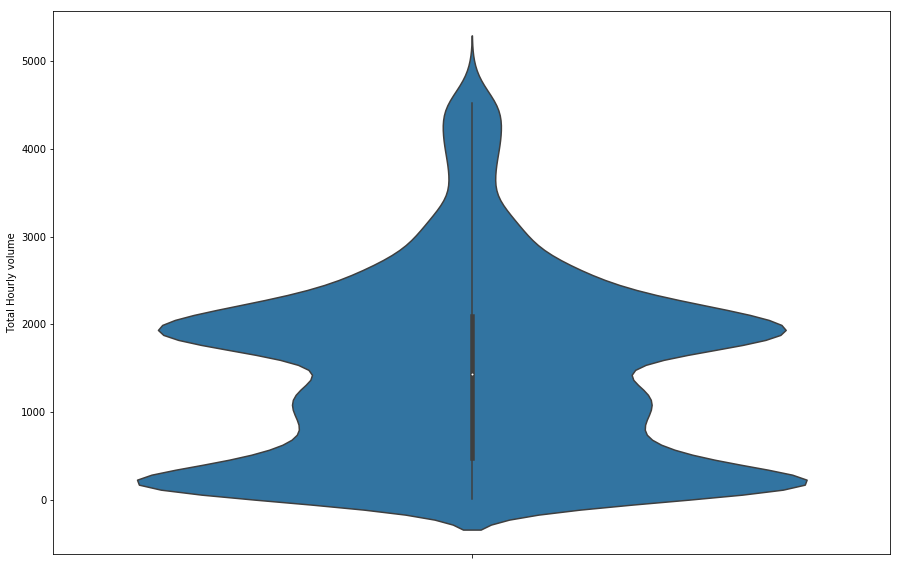

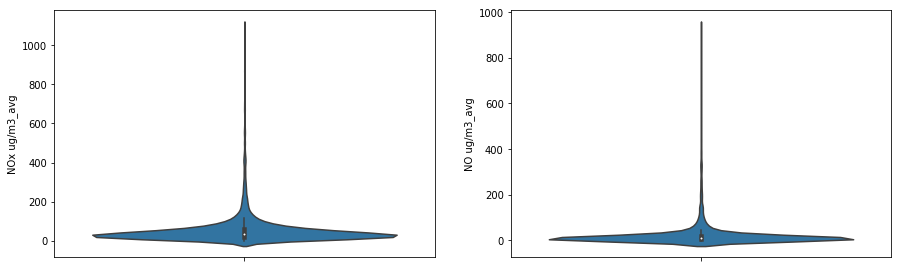

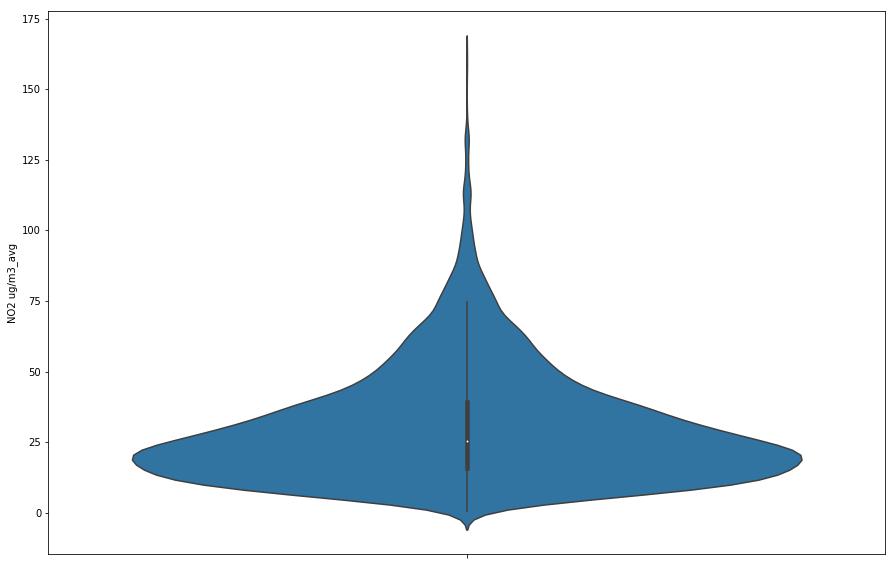

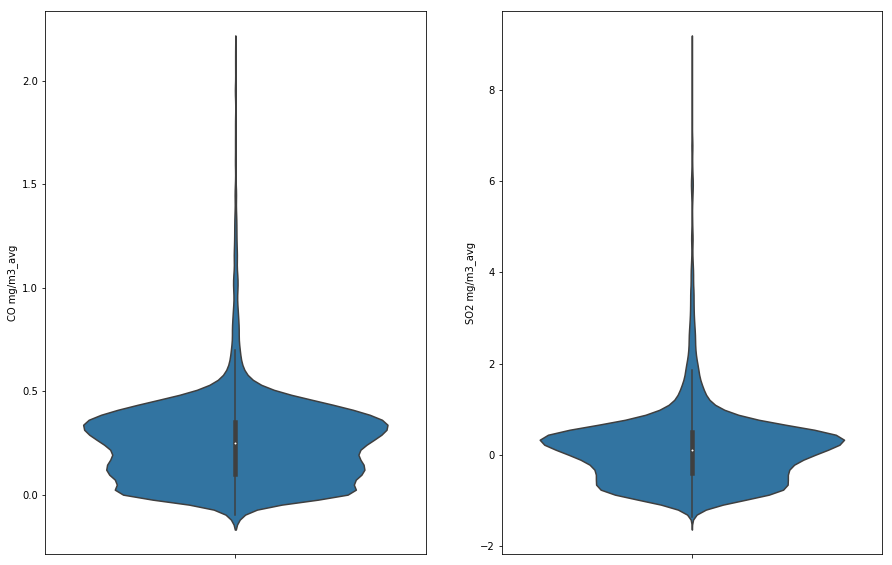

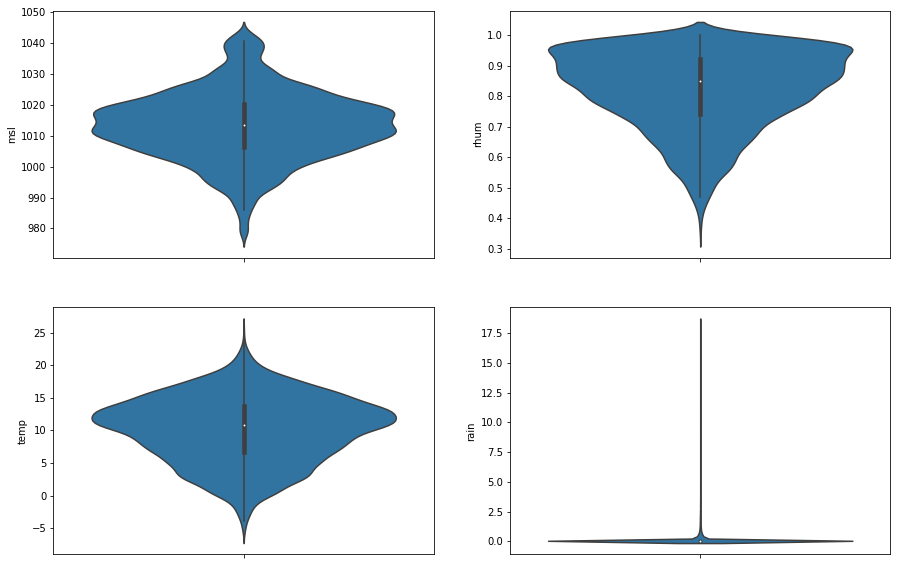

In [124]:
fig19=plt.figure(figsize=(15,10))
sns.violinplot(y="Total Hourly volume", data=df2_indexed,scale="count")
fig20=plt.figure(figsize=(15,10))
fig20.add_subplot(2,2,1)
sns.violinplot(y="NOx ug/m3_avg", data=df2_indexed,scale="count")
plt.subplot(222)
sns.violinplot(y="NO ug/m3_avg", data=df2_indexed,scale="count")
fig21=plt.figure(figsize=(15,10))
sns.violinplot(y="NO2 ug/m3_avg", data=df2_indexed,scale="count")
fig22=plt.figure(figsize=(15,10))
plt.subplot(121)
sns.violinplot(y="CO mg/m3_avg", data=df2_indexed,scale="count")
plt.subplot(122)
sns.violinplot(y="SO2 mg/m3_avg", data=df2_indexed,scale="count")
fig23=plt.figure(figsize=(15,10))

plt.subplot(221)
sns.violinplot(y="msl", data=df2_indexed,scale="count")

plt.subplot(222)
sns.violinplot(y="rhum", data=df2_indexed,scale="count")
plt.subplot(223)
sns.violinplot(y="temp", data=df2_indexed,scale="count")
plt.subplot(224)
sns.violinplot(y="rain", data=df2_indexed,scale="count")

In [125]:
df2_indexed.isnull().sum()

Day                         0
Month                       0
Time                        0
Datetime                    0
Hourly volume Southbound    0
Hourly volume Eastbound     0
Total Hourly volume         0
NO ug/m3_avg                0
NO2 ug/m3_avg               0
NOx ug/m3_avg               0
CO mg/m3_avg                0
SO2 mg/m3_avg               0
msl                         0
rain                        0
rhum                        0
temp                        0
dtype: int64

In [126]:
df_group=df2_indexed.groupby("Time").mean()

In [127]:
df_group.isnull().sum()


Month                       0
Hourly volume Southbound    0
Hourly volume Eastbound     0
Total Hourly volume         0
NO ug/m3_avg                0
NO2 ug/m3_avg               0
NOx ug/m3_avg               0
CO mg/m3_avg                0
SO2 mg/m3_avg               0
msl                         0
rain                        0
rhum                        0
temp                        0
dtype: int64

In [128]:
df_group

,Month,Hourly volume Southbound,Hourly volume Eastbound,Total Hourly volume,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
Time,,,,,,,,,,,,,
1,6.677914,111.453988,255.515337,366.969325,20.446626,23.742638,44.192638,0.241411,0.061656,1013.600000,0.069632,0.895000,8.517485
2,6.677914,64.852761,205.990798,270.843558,19.022086,21.573926,40.591104,0.227761,0.026380,1013.452761,0.058896,0.899325,8.396012
3,6.677914,43.257669,200.236196,243.493865,17.086350,19.947546,37.035583,0.210276,0.003528,1013.302761,0.066258,0.901871,8.298466
4,6.677914,39.401840,217.865031,257.266871,16.270706,19.337577,35.611196,0.196319,0.004755,1013.195092,0.066871,0.904141,8.177607
5,6.677914,59.453988,267.039877,326.493865,19.932822,20.230675,40.157975,0.197546,0.040184,1013.202454,0.047546,0.904847,8.090184
6,6.677914,134.343558,328.404908,462.748466,28.978067,24.677454,53.657209,0.225920,0.127761,1013.271166,0.049693,0.902945,8.280675
7,6.677914,379.500000,759.214724,1138.714724,47.224080,32.448773,79.674847,0.246626,0.241104,1013.409816,0.034969,0.885307,8.748773
8,6.677914,976.644172,1493.760736,2470.404908,53.093098,38.070552,91.156748,0.258436,0.288190,1013.606748,0.032515,0.859724,9.406748
9,6.677914,1526.788344,1438.312883,2965.101227,51.502607,38.609202,90.106135,0.255828,0.288344,1013.715337,0.043252,0.823221,10.287730


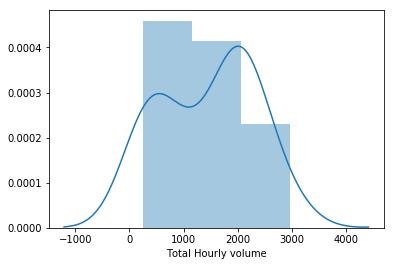

In [129]:
sns.distplot(df_group["Total Hourly volume"])

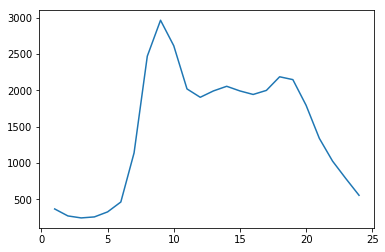

In [130]:
plt.plot(df_group["Total Hourly volume"])

In [137]:
df2_indexed.head()

,Day,Month,Time,Datetime,Hourly volume Southbound,Hourly volume Northbound,Hourly volume Westbound,Hourly volume Eastbound,vol TO the city,vol FROM the city,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
Datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 01:00:00,Saturday,1,1,2011-01-01 01:00:00,63,108,84,80,143,192,21.40,36.30,57.70,0.35,1.20,1028.0,0.0,0.86,5.5
2011-01-01 02:00:00,Saturday,1,2,2011-01-01 02:00:00,87,198,166,99,186,364,12.15,34.05,46.20,0.35,1.00,1027.6,0.0,0.88,5.4
2011-01-01 03:00:00,Saturday,1,3,2011-01-01 03:00:00,74,120,125,81,155,245,9.35,30.90,40.30,0.35,0.90,1027.5,0.0,0.89,5.3
2011-01-01 04:00:00,Saturday,1,4,2011-01-01 04:00:00,61,104,80,66,127,184,11.75,32.65,44.45,0.30,0.85,1027.5,0.0,0.90,5.3
2011-01-01 05:00:00,Saturday,1,5,2011-01-01 05:00:00,38,71,72,51,89,143,6.90,27.40,34.30,0.25,0.75,1027.3,0.0,0.90,5.5


In [138]:
df2_indexed.corr()

,Month,Time,Hourly volume Southbound,Hourly volume Northbound,Hourly volume Westbound,Hourly volume Eastbound,vol TO the city,vol FROM the city,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
Month,1.000000,-0.000182,0.021758,0.024529,0.012995,0.006057,0.014471,0.019427,-0.195474,-0.294299,-0.231331,-0.259035,-0.321212,-0.204731,0.030812,0.046311,0.288883
Time,-0.000182,1.000000,0.216263,0.609596,0.402972,0.252929,0.254315,0.530019,-0.025645,0.162298,0.018829,0.115037,0.028468,0.003508,0.030057,-0.188523,0.113035
Hourly volume Southbound,0.021758,0.216263,1.000000,0.527010,0.402648,0.717512,0.916814,0.490235,0.103437,0.238360,0.142648,0.065834,0.088134,-0.000961,0.016187,-0.361556,0.218226
Hourly volume Northbound,0.024529,0.609596,0.527010,1.000000,0.745930,0.503534,0.555058,0.919544,-0.012380,0.197951,0.038379,0.110902,0.041130,-0.007773,0.043686,-0.347023,0.212799
Hourly volume Westbound,0.012995,0.402972,0.402648,0.745930,1.000000,0.640187,0.570536,0.947654,-0.008730,0.149136,0.029409,0.077860,0.023928,0.001806,0.011579,-0.353818,0.223198
Hourly volume Eastbound,0.006057,0.252929,0.717512,0.503534,0.640187,1.000000,0.935966,0.619140,0.081253,0.208307,0.117211,0.075765,0.077146,-0.000079,0.005505,-0.313446,0.193396
vol TO the city,0.014471,0.254315,0.916814,0.555058,0.570536,0.935966,1.000000,0.602744,0.098866,0.239904,0.139300,0.076712,0.088776,-0.000531,0.011338,-0.362451,0.221179
vol FROM the city,0.019427,0.530019,0.490235,0.919544,0.947654,0.619140,0.602744,1.000000,-0.011086,0.182897,0.035752,0.099109,0.033837,-0.002661,0.027776,-0.375136,0.233715
NO ug/m3_avg,-0.195474,-0.025645,0.103437,-0.012380,-0.008730,0.081253,0.098866,-0.011086,1.000000,0.691673,0.984253,0.632615,0.690424,0.238951,-0.021380,0.128647,-0.246633
NO2 ug/m3_avg,-0.294299,0.162298,0.238360,0.197951,0.149136,0.208307,0.239904,0.182897,0.691673,1.000000,0.808441,0.545088,0.557521,0.258595,-0.002760,0.039587,-0.248733


In [193]:
df22=df2_indexed.drop(df2_indexed.columns[[0,1,2,3,4,5,9]],axis=1)

In [197]:
correlations=df22.corr()

In [228]:
mask=(correlations<-0.1) & (correlations>-0.1) 


correlations[(correlations>0.1)|(correlations<-0.1)]

,Total Hourly volume,NO ug/m3_avg,NO2 ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
Total Hourly volume,1.000000,NaN,0.239904,NaN,NaN,NaN,NaN,-0.362451,0.221179
NO ug/m3_avg,NaN,1.000000,0.691673,0.632615,0.690424,0.238951,NaN,0.128647,-0.246633
NO2 ug/m3_avg,0.239904,0.691673,1.000000,0.545088,0.557521,0.258595,NaN,NaN,-0.248733
CO mg/m3_avg,NaN,0.632615,0.545088,1.000000,0.638587,0.131790,NaN,NaN,NaN
SO2 mg/m3_avg,NaN,0.690424,0.557521,0.638587,1.000000,0.247906,NaN,NaN,-0.146944
msl,NaN,0.238951,0.258595,0.131790,0.247906,1.000000,-0.150572,NaN,-0.115062
rain,NaN,NaN,NaN,NaN,NaN,-0.150572,1.000000,0.150364,NaN
rhum,-0.362451,0.128647,NaN,NaN,NaN,NaN,0.150364,1.000000,-0.504671
temp,0.221179,-0.246633,-0.248733,NaN,-0.146944,-0.115062,NaN,-0.504671,1.000000


In [229]:
correlations

,Total Hourly volume,NO ug/m3_avg,NO2 ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
Total Hourly volume,1.000000,0.098866,0.239904,0.076712,0.088776,-0.000531,0.011338,-0.362451,0.221179
NO ug/m3_avg,0.098866,1.000000,0.691673,0.632615,0.690424,0.238951,-0.021380,0.128647,-0.246633
NO2 ug/m3_avg,0.239904,0.691673,1.000000,0.545088,0.557521,0.258595,-0.002760,0.039587,-0.248733
CO mg/m3_avg,0.076712,0.632615,0.545088,1.000000,0.638587,0.131790,0.002606,0.055941,-0.065376
SO2 mg/m3_avg,0.088776,0.690424,0.557521,0.638587,1.000000,0.247906,-0.035066,0.000700,-0.146944
msl,-0.000531,0.238951,0.258595,0.131790,0.247906,1.000000,-0.150572,-0.083588,-0.115062
rain,0.011338,-0.021380,-0.002760,0.002606,-0.035066,-0.150572,1.000000,0.150364,0.012010
rhum,-0.362451,0.128647,0.039587,0.055941,0.000700,-0.083588,0.150364,1.000000,-0.504671
temp,0.221179,-0.246633,-0.248733,-0.065376,-0.146944,-0.115062,0.012010,-0.504671,1.000000


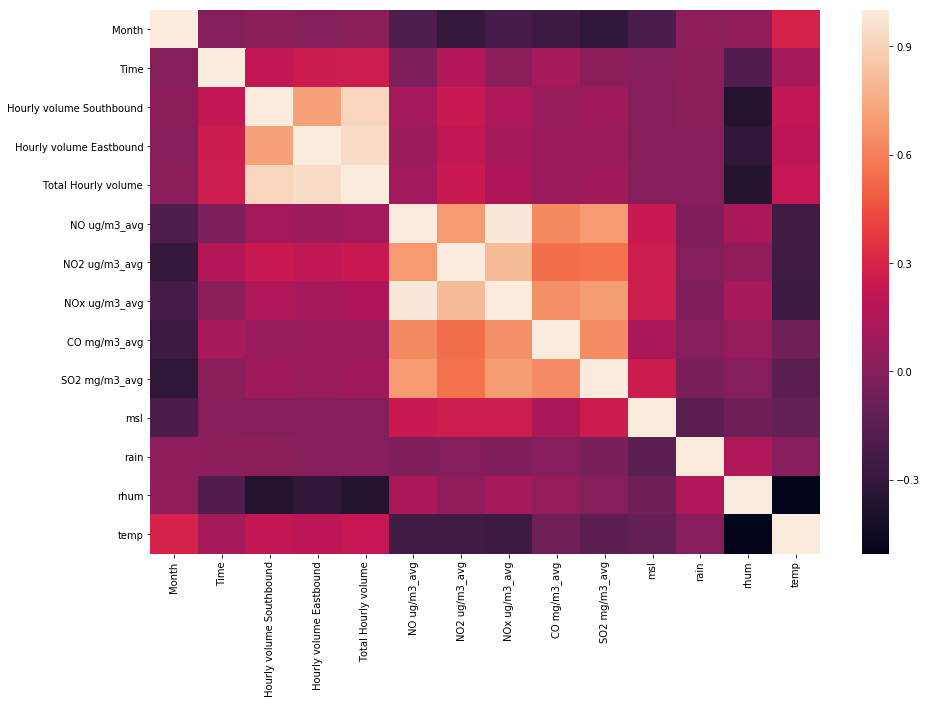

In [134]:
fig19=plt.figure(figsize=(15,10))
sns.heatmap(df2_indexed.corr())

In [135]:
df2_indexed.columns

Index(['Day', 'Month', 'Time', 'Datetime', 'Hourly volume Southbound',
       'Hourly volume Eastbound', 'Total Hourly volume', 'NO ug/m3_avg',
       'NO2 ug/m3_avg', 'NOx ug/m3_avg', 'CO mg/m3_avg', 'SO2 mg/m3_avg',
       'msl', 'rain', 'rhum', 'temp'],
      dtype='object')

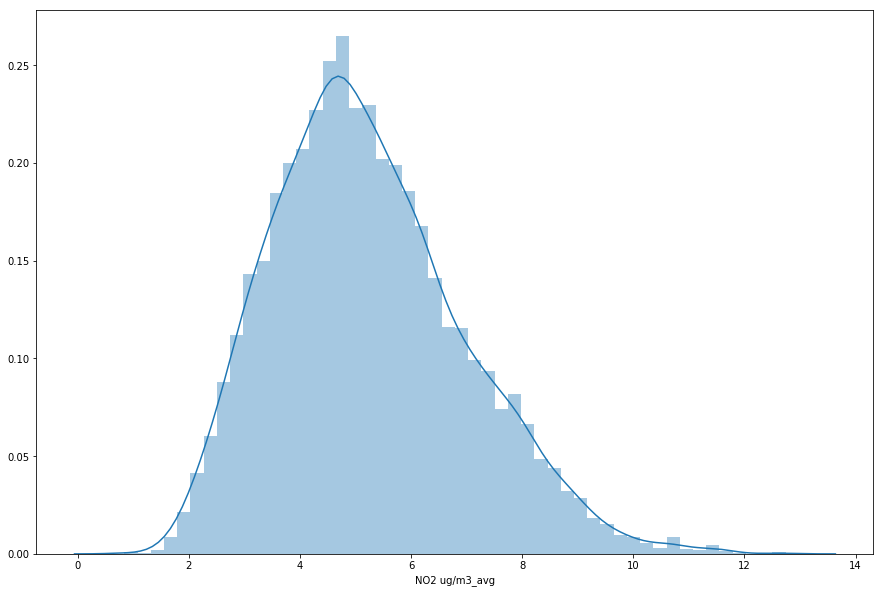

In [136]:
fig18=plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(df2_indexed["NO2 ug/m3_avg"]))

In [111]:
x=df2_indexed[['Total Hourly volume', 'msl', 'rain', 'rhum', 'temp']]

In [112]:
y1=df2_indexed['NO ug/m3_avg']
y2=np.sqrt(df2_indexed['NO2 ug/m3_avg'])
y3=np.sqrt(df2_indexed['NOx ug/m3_avg'])

In [116]:
df2_indexed.head()

,Day,Month,Time,Datetime,Hourly volume Southbound,Hourly volume Eastbound,Total Hourly volume,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
Datetime,,,,,,,,,,,,,,,,
2011-01-01 01:00:00,Saturday,1,1,2011-01-01 01:00:00,63,80,143,21.40,36.30,57.70,0.35,1.20,1028.0,0.0,0.86,5.5
2011-01-01 02:00:00,Saturday,1,2,2011-01-01 02:00:00,87,99,186,12.15,34.05,46.20,0.35,1.00,1027.6,0.0,0.88,5.4
2011-01-01 03:00:00,Saturday,1,3,2011-01-01 03:00:00,74,81,155,9.35,30.90,40.30,0.35,0.90,1027.5,0.0,0.89,5.3
2011-01-01 04:00:00,Saturday,1,4,2011-01-01 04:00:00,61,66,127,11.75,32.65,44.45,0.30,0.85,1027.5,0.0,0.90,5.3
2011-01-01 05:00:00,Saturday,1,5,2011-01-01 05:00:00,38,51,89,6.90,27.40,34.30,0.25,0.75,1027.3,0.0,0.90,5.5


# Prediction Model for NO

## Splitting the Data and train the Model

In [113]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y1, test_size=0.33, random_state=42)

In [114]:
model1=LinearRegression()

In [115]:
model1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [142]:
print(model1.intercept_)

-1373.2653732


In [143]:
model1.coef_

array([  1.16811331e-02,   1.34060582e+00,  -7.08903399e-01,
         6.15958786e+01,  -2.57265028e+00])

In [144]:
cdf1=pd.DataFrame(model1.coef_,x.columns,columns=["Coeff"])

In [145]:
cdf1

,Coeff
Total Hourly volume,0.011681
msl,1.340606
rain,-0.708903
rhum,61.595879
temp,-2.572650


## Predictions

In [146]:
predictions1=model1.predict(X_test1)

In [147]:
predictions11=model1.predict(X_train1)

In [148]:
r2_score(y_train1,predictions11)

0.12827413897751883

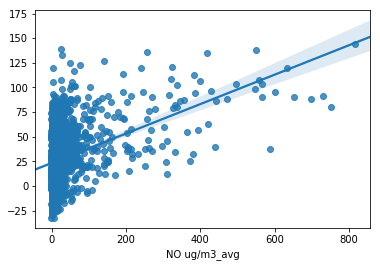

In [149]:
sns.regplot(y_test1,predictions1)

In [150]:
r2_score(y_test1,predictions1)

0.15424482551376661

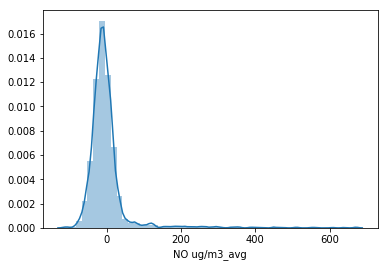

In [151]:
sns.distplot(y_test1-predictions1)

In [152]:
metrics.mean_absolute_error(y_test1,predictions1)

30.077962426932288

In [153]:
metrics.mean_squared_error(y_test1,predictions1)

3705.0592486339283

In [154]:
 np.sqrt(metrics.mean_squared_error(y_test1,predictions1))

60.86919786422299

# Prediction Model for NO2

## Splitting the Data  and train the Model

In [155]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y2, test_size=0.33, random_state=42)

model2=LinearRegression()

model2.fit(X_train2,y_train2)

cdf2=pd.DataFrame(model2.coef_,x.columns,columns=["Coeff"])

In [156]:
print(model2.intercept_)


-29.3338201759


In [157]:
cdf2a

,Coeff
Total Hourly volume,0.000567
msl,0.034154
rain,0.102506
rhum,0.123194
temp,-0.094629


## Predictions

In [158]:
predictions2=model2.predict(X_test2)

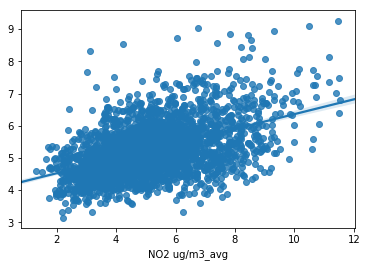

In [159]:
sns.regplot(y_test2,predictions2)

In [160]:
r2_score(y_test2,predictions2)

0.22127629123346459

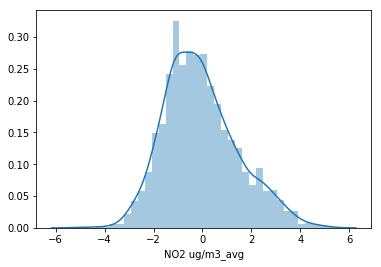

In [161]:
sns.distplot(y_test2-predictions2)

In [162]:
metrics.mean_absolute_error(y_test2,predictions2)


1.2041947143098186

In [192]:
metrics.mean_squared_error(y_test2,predictions2)

2.2429787891448645

In [193]:
 np.sqrt(metrics.mean_squared_error(y_test2,predictions2))

1.4976577676975686

# Prediction Model for NOx

## Splitting the Data and train the Model

In [194]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y3, test_size=0.33, random_state=42)

model3=LinearRegression()

model3.fit(X_train3,y_train3)

cdf3=pd.DataFrame(model2.coef_,x.columns,columns=["Coeff"])

In [195]:
cdf3

,Coeff
Total Hourly volume,0.000563
msl,0.033998
rain,0.085088
rhum,0.067868
temp,-0.093017


## Predictions

In [196]:
predictions3=model3.predict(X_test3)

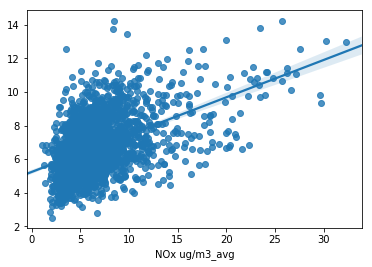

In [197]:
sns.regplot(y_test3,predictions3)

In [199]:
r2_score(y_test3,predictions3)

0.2273587058732558

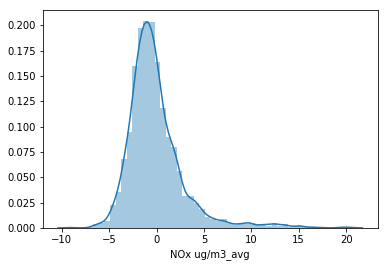

In [198]:
sns.distplot(y_test3-predictions3)

In [147]:
metrics.mean_absolute_error(y_test3,predictions3)


2.0901728164195261

In [148]:
metrics.mean_squared_error(y_test3,predictions3)

9.2074641136605742

In [149]:
 np.sqrt(metrics.mean_squared_error(y_test3,predictions3))

3.0343803508559328